# Análise Estatística do ENEM

---
## 1️⃣ Introdução
Projeto da Semana 5 da jornada DataScienceJourney.

Objetivo: aplicar conceitos de estatística descritiva e análise exploratória
em dados educacionais do ENEM, buscando padrões, distribuições e relações
entre variáveis.

---
## 2️⃣ Preparação dos Dados

#### Importação das bibliotecas

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

plt.style.use("seaborn-v0_8")

#### Carregamento do dataset

In [32]:
df = pd.read_csv(
    "data/enem_2019_sample.csv",
    sep=",",
    encoding="latin1",
    low_memory=False
)

#### Exploração Inicial

In [33]:
df.shape

(127380, 136)

In [34]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025'],
      dtype='object', length=136)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(24), int64(71), object(41)
memory usage: 132.2+ MB


#### Seleção das Variáveis

In [36]:
colunas_estatistica = [
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_REDACAO",
    "TP_SEXO",
    "TP_ESCOLA"
]

df_stats = df[colunas_estatistica].copy()

In [37]:
df_stats.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO,TP_ESCOLA
0,435.6,512.3,488.6,432.4,420.0,M,1
1,NaN,409.3,375.3,NaN,400.0,M,1
2,423.2,499.1,441.0,427.2,560.0,F,1
3,426.2,578.1,551.5,499.9,500.0,F,1
4,516.5,571.3,511.2,424.5,780.0,F,1


#### Tratamento de valores ausentes

In [38]:
df_stats.isnull().sum().sort_values(ascending=False)

NU_NOTA_CN         34622
NU_NOTA_MT         34622
NU_NOTA_CH         29337
NU_NOTA_LC         29337
NU_NOTA_REDACAO    29337
TP_SEXO                0
TP_ESCOLA              0
dtype: int64

---
## 3️⃣ Estatística Descritiva

#### Estatística descritiva geral

In [39]:
df_stats.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ESCOLA
count,92758.000000,98043.000000,98043.000000,92758.000000,98043.000000,127380.000000
mean,477.964015,507.365912,520.463928,523.555206,571.570025,1.330515
std,76.296099,82.972839,64.556578,109.416939,188.076455,0.555043
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,418.000000,447.900000,483.700000,435.300000,480.000000,1.000000
50%,470.200000,510.900000,526.100000,501.600000,580.000000,1.000000
75%,533.300000,567.100000,565.100000,598.200000,680.000000,2.000000
max,797.300000,809.400000,801.700000,985.000000,1000.000000,3.000000


#### Definição da amostra

In [40]:
mt = df_stats["NU_NOTA_MT"].dropna()
lc = df_stats["NU_NOTA_LC"].dropna()
cn = df_stats["NU_NOTA_CN"].dropna()
ch = df_stats["NU_NOTA_CH"].dropna()

---
## 4️⃣ Análise de Distribuição

#### Média vs Mediana

In [41]:
estatisticas = pd.DataFrame({
    "Média": [mt.mean(), lc.mean(), cn.mean(), ch.mean()],
    "Mediana": [mt.median(), lc.median(), cn.median(), ch.median()]
}, index=["Matemática", "Linguagens", "Natureza", "Humanas"])

estatisticas

,Média,Mediana
Matemática,523.555206,501.6
Linguagens,520.463928,526.1
Natureza,477.964015,470.2
Humanas,507.365912,510.9


#### Histogramas

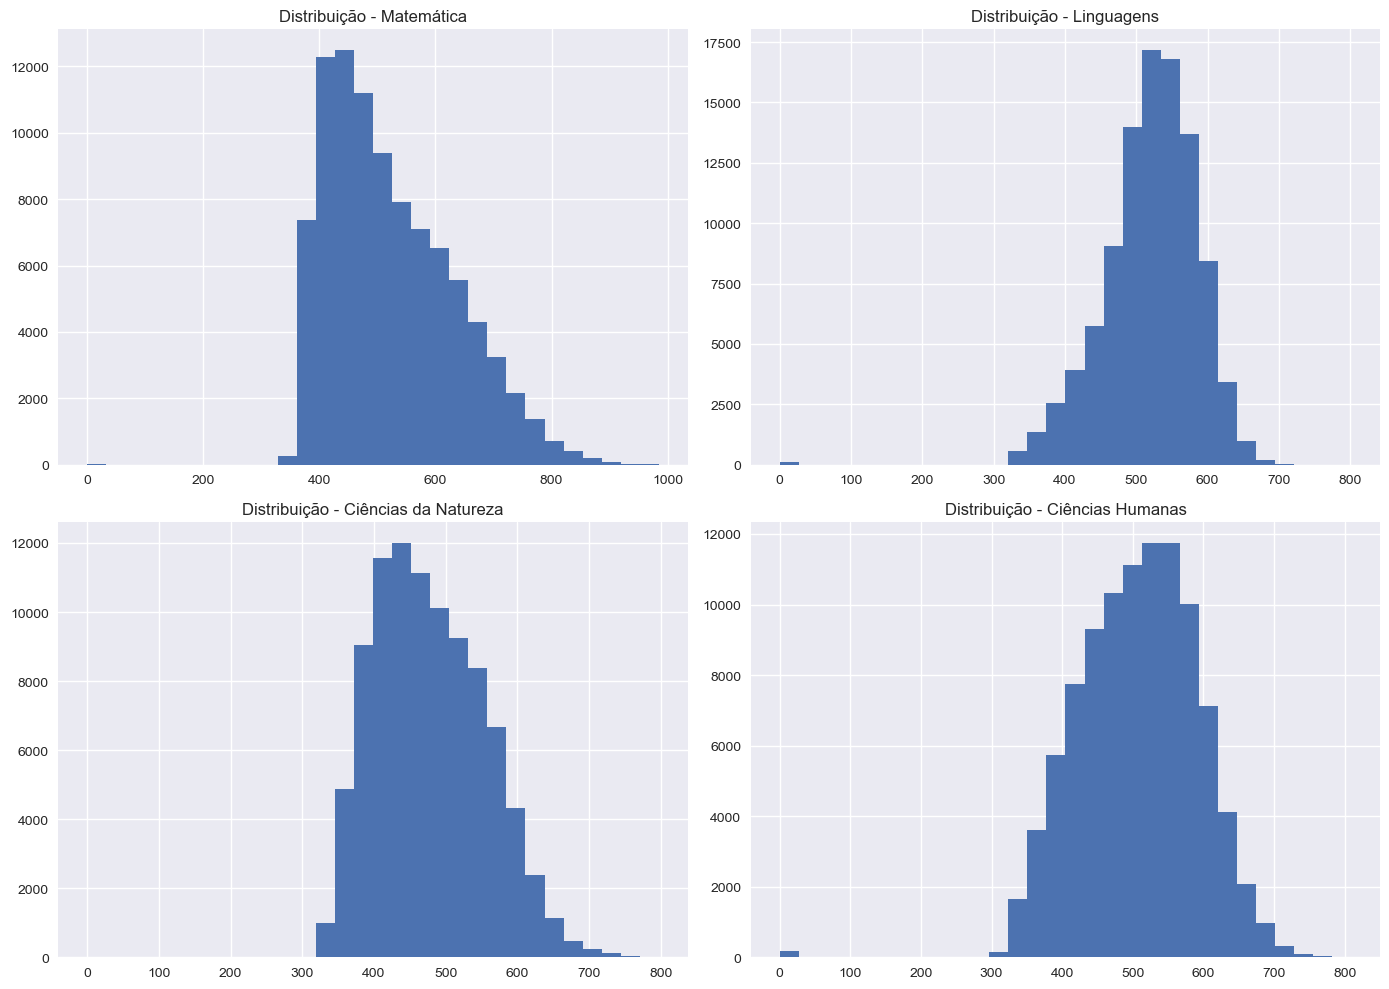

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(mt, bins=30)
axes[0, 0].set_title("Distribuição - Matemática")

axes[0, 1].hist(lc, bins=30)
axes[0, 1].set_title("Distribuição - Linguagens")

axes[1, 0].hist(cn, bins=30)
axes[1, 0].set_title("Distribuição - Ciências da Natureza")

axes[1, 1].hist(ch, bins=30)
axes[1, 1].set_title("Distribuição - Ciências Humanas")

plt.tight_layout()
plt.show()

#### Boxplots

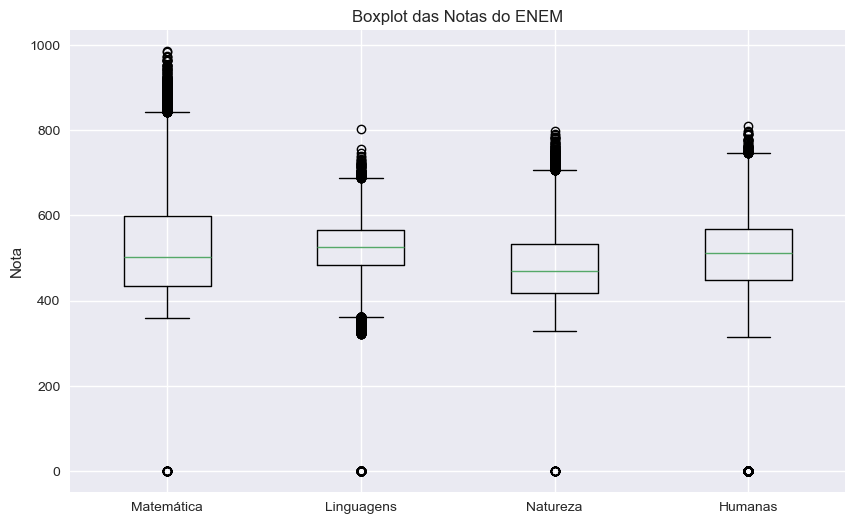

In [43]:
plt.figure(figsize=(10, 6))
plt.boxplot(
    [mt, lc, cn, ch],
    tick_labels=["Matemática", "Linguagens", "Natureza", "Humanas"]
)
plt.title("Boxplot das Notas do ENEM")
plt.ylabel("Nota")
plt.show()

### 📊 Análise Integrada das Distribuições das Notas

A análise combinada entre estatística descritiva (média e mediana) e visualizações gráficas (histogramas e boxplots) permite compreender de forma mais robusta o comportamento das notas nas quatro áreas do ENEM.

---

#### 📈 Assimetria das Distribuições

A comparação entre média e mediana indicou padrões distintos entre as provas:

- **Matemática** e **Ciências da Natureza** apresentam média superior à mediana, sugerindo leve assimetria positiva (cauda à direita).
- **Linguagens** e **Ciências Humanas** apresentam mediana superior à média, indicando leve assimetria negativa (cauda à esquerda).

Os histogramas confirmam esses comportamentos, evidenciando distribuições aproximadamente unimodais, porém com pequenas distorções nas caudas.

---

#### 📦 Dispersão e Variabilidade

A análise visual dos boxplots e do espalhamento das notas revela diferenças claras de variabilidade entre as áreas:

- **Matemática apresenta maior dispersão**, com amplitude mais extensa e maior presença de valores extremos.
- **Ciências da Natureza** também apresenta variabilidade relevante, embora inferior à de Matemática.
- **Linguagens e Ciências Humanas** mostram distribuição mais concentrada, indicando menor variabilidade relativa.

A maior diferença entre média e mediana em Matemática reforça a presença de maior heterogeneidade nessa área.

---

#### 🎯 Conclusão do Bloco de Distribuição

As provas não apresentam comportamento estatístico homogêneo.

Cada área possui características próprias de assimetria e dispersão, o que justifica análises comparativas posteriores considerando suas particularidades.

Essa etapa consolida a compreensão estrutural das distribuições antes da análise segmentada por grupos.


---
## 5️⃣ Análise Comparativa por Sexo

Nesta etapa será realizada uma análise comparativa das notas do ENEM entre candidatos do sexo masculino e feminino. 
Serão avaliadas média, mediana e desvio padrão para identificar diferenças de desempenho e variabilidade.

#### Distribuição da variável

In [44]:
df_stats["TP_SEXO"].value_counts()

TP_SEXO
F    75883
M    51497
Name: count, dtype: int64

In [45]:
df_stats["TP_SEXO"].value_counts(normalize=True) * 100

TP_SEXO
F    59.572146
M    40.427854
Name: proportion, dtype: float64

#### Média

In [46]:
df_stats.groupby("TP_SEXO")[["NU_NOTA_MT",
                             "NU_NOTA_LC",
                             "NU_NOTA_CN",
                             "NU_NOTA_CH"]].mean()

,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_CH
TP_SEXO,,,,
F,506.470174,519.520612,470.094586,501.700472
M,548.568020,521.857227,489.485010,515.733890


#### Mediana

In [47]:
df_stats.groupby("TP_SEXO")[["NU_NOTA_MT",
                              "NU_NOTA_LC",
                              "NU_NOTA_CN",
                              "NU_NOTA_CH"]].median()

,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_CH
TP_SEXO,,,,
F,484.2,523.9,461.3,504.6
M,535.1,529.5,484.6,522.0


#### Desvio padrão

In [48]:
df_stats.groupby("TP_SEXO")[["NU_NOTA_MT",
                              "NU_NOTA_LC",
                              "NU_NOTA_CN",
                              "NU_NOTA_CH"]].std()

,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_CH
TP_SEXO,,,,
F,101.057364,62.859653,73.451007,80.492665
M,116.169267,66.960880,78.877048,85.825726


#### Boxplot

<Figure size 800x500 with 0 Axes>

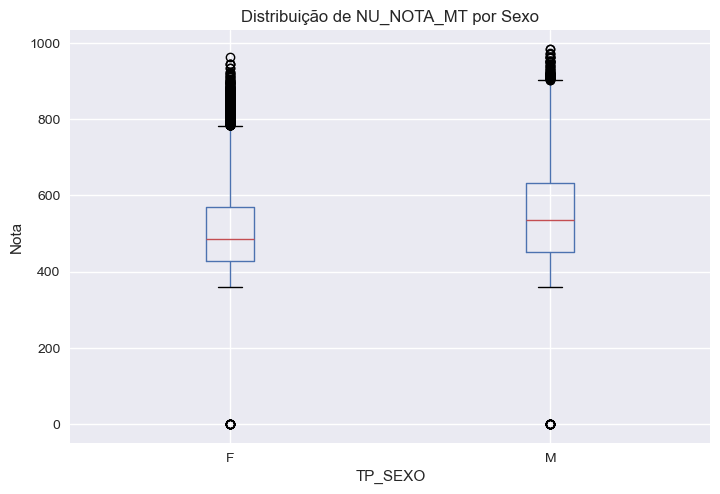

<Figure size 800x500 with 0 Axes>

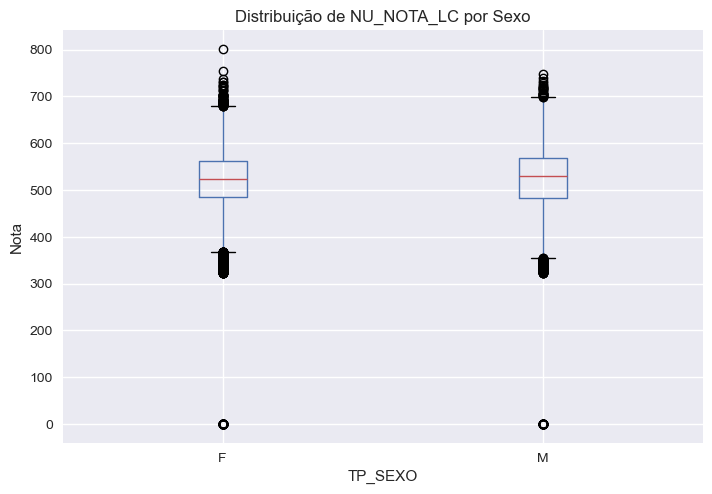

<Figure size 800x500 with 0 Axes>

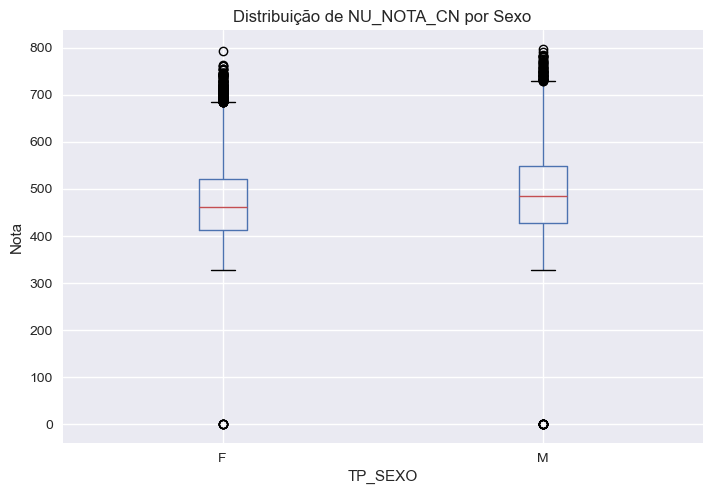

<Figure size 800x500 with 0 Axes>

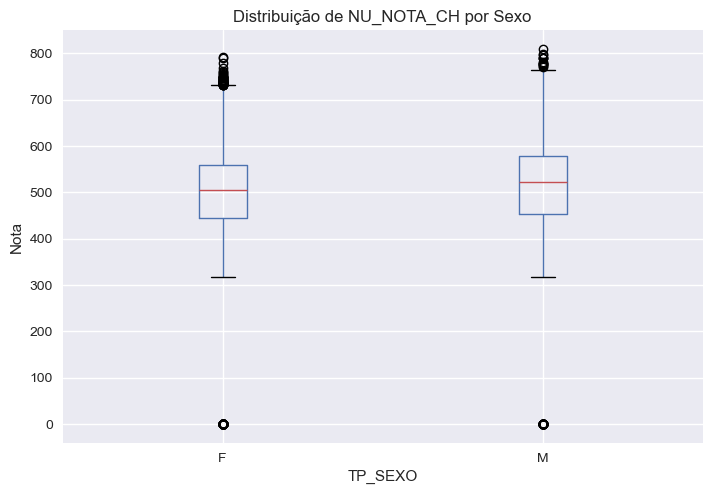

In [49]:
areas = ["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CN", "NU_NOTA_CH"]

for area in areas:
    plt.figure(figsize=(8,5))
    df_stats.boxplot(column=area, by="TP_SEXO")
    plt.title(f"Distribuição de {area} por Sexo")
    plt.suptitle("")
    plt.ylabel("Nota")
    plt.show()


### 📊 Análise interpretativa

A base analisada apresenta maior participação feminina (59,6%) em comparação ao público masculino (40,4%), o que garante representatividade estatística adequada para ambos os grupos.

#### 🔎 Comparação das Médias

Observa-se que os candidatos do sexo masculino apresentam médias superiores em todas as áreas do conhecimento:

- Matemática: diferença expressiva (~42 pontos)
- Ciências da Natureza: diferença relevante (~19 pontos)
- Ciências Humanas: diferença moderada (~14 pontos)
- Linguagens: diferença pequena (~2 pontos)

A maior disparidade ocorre em Matemática, indicando possível diferença estrutural de desempenho nessa área.

---

#### 📍 Comparação das Medianas

A mediana confirma o padrão observado nas médias:

- Matemática apresenta diferença significativa (~51 pontos)
- Natureza e Humanas mantêm vantagem masculina
- Linguagens apresenta diferença pequena, mas ainda favorável aos homens

A consistência entre média e mediana indica que a diferença não é causada apenas por valores extremos, mas reflete um comportamento central da distribuição.

---

#### 📈 Análise da Dispersão (Desvio Padrão)

Em todas as áreas, o desvio padrão masculino é superior ao feminino.

Isso indica que:

- As notas masculinas apresentam maior variabilidade.
- Existe maior dispersão e amplitude de desempenho entre homens.
- O grupo masculino possui maior concentração tanto em notas altas quanto em notas baixas.

O grupo feminino apresenta distribuição mais concentrada, com menor variabilidade.

---

### 🎯 Conclusão Estatística

- Existe diferença consistente de desempenho entre os sexos.
- A maior disparidade ocorre em Matemática.
- A variabilidade é maior entre homens em todas as áreas.
- Linguagens é a área com menor diferença entre os grupos.

Essa análise caracteriza uma estatística descritiva comparativa robusta, permitindo identificar padrões de desigualdade de desempenho entre grupos.


---
## 6️⃣ Análise Comparativa por Tipo de Escola

#### Entendimento da variável

In [50]:
df_stats["TP_ESCOLA"].value_counts()

TP_ESCOLA
1    90807
2    31045
3     5528
Name: count, dtype: int64

#### Decisão metodológica (exclusão código 1)

Temos:
* ~71% “Não respondeu”
* ~24% Pública
* ~4% Privada

Se eu incluir o código 1 na análise, estarei comparando informação ausente com informação real.

Isso gera viés, por isso irei analizar apenas o código 2 (pública) e 3 (privada).

In [51]:
df_escola = df_stats[df_stats["TP_ESCOLA"].isin([2,3])].copy()

df_escola["TP_ESCOLA"] = df_escola["TP_ESCOLA"].map({
    2: "Pública",
    3: "Privada"
})

In [52]:
df_escola["TP_ESCOLA"].value_counts()
df_escola["TP_ESCOLA"].value_counts(normalize=True) * 100

TP_ESCOLA
Pública    84.885024
Privada    15.114976
Name: proportion, dtype: float64

#### Média

In [53]:
df_escola.groupby("TP_ESCOLA")[["NU_NOTA_MT",
                                 "NU_NOTA_LC",
                                 "NU_NOTA_CN",
                                 "NU_NOTA_CH"]].mean()

,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_CH
TP_ESCOLA,,,,
Privada,619.175696,565.292078,540.305914,567.474275
Pública,504.574418,507.128597,460.593477,490.064588


#### Mediana

In [54]:
df_escola.groupby("TP_ESCOLA")[["NU_NOTA_MT",
                                 "NU_NOTA_LC",
                                 "NU_NOTA_CN",
                                 "NU_NOTA_CH"]].median()

,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_CH
TP_ESCOLA,,,,
Privada,627.5,572.45,551.05,579.1
Pública,485.4,514.30,453.15,492.5


#### Desvio padrão

In [55]:
df_escola.groupby("TP_ESCOLA")[["NU_NOTA_MT",
                                 "NU_NOTA_LC",
                                 "NU_NOTA_CN",
                                 "NU_NOTA_CH"]].std()

,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_CH
TP_ESCOLA,,,,
Privada,117.694690,54.768913,75.518599,76.346427
Pública,95.055594,62.717389,67.325818,76.477379


#### Boxplot

<Figure size 1000x600 with 0 Axes>

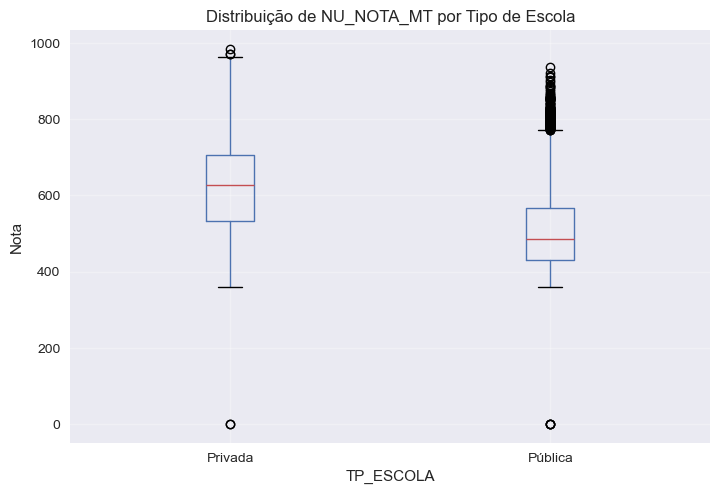

<Figure size 1000x600 with 0 Axes>

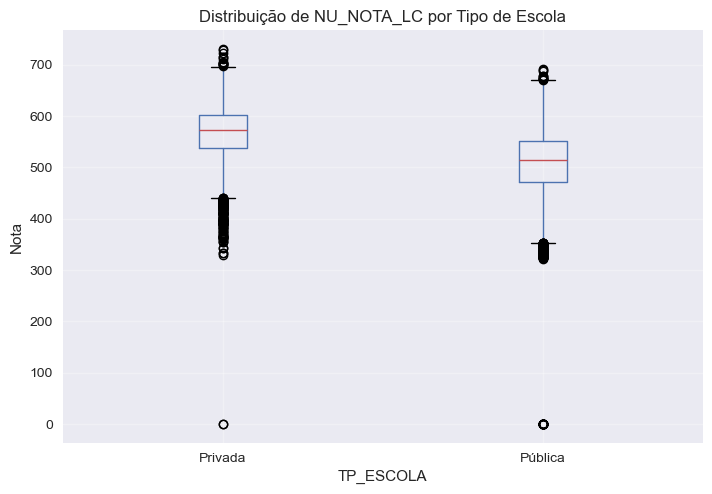

<Figure size 1000x600 with 0 Axes>

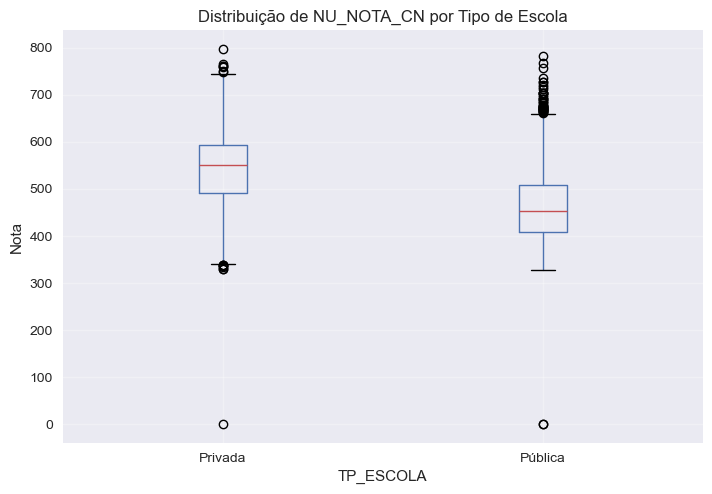

<Figure size 1000x600 with 0 Axes>

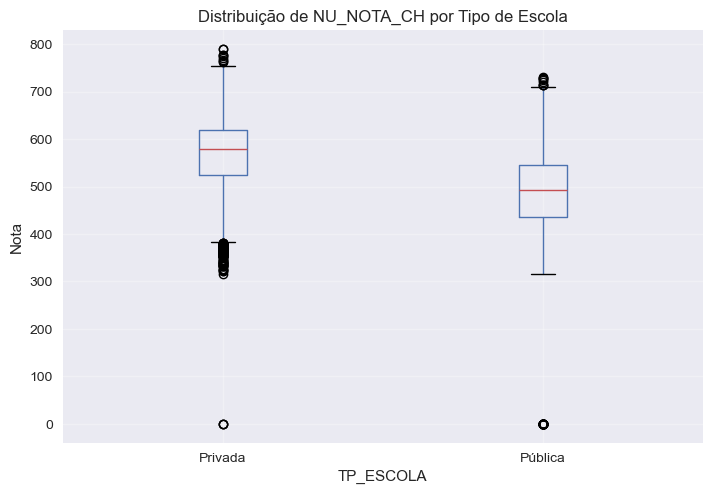

In [56]:
areas = ["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CN", "NU_NOTA_CH"]

for area in areas:
    plt.figure(figsize=(10,6))
    df_escola.boxplot(column=area, by="TP_ESCOLA")
    plt.title(f"Distribuição de {area} por Tipo de Escola")
    plt.suptitle("")
    plt.ylabel("Nota")
    plt.grid(alpha=0.3)
    plt.show()

### 📊 Análise interpretativa

Após a exclusão dos registros classificados como "Não respondeu", a análise foi conduzida comparando candidatos de escolas públicas e privadas.

Observa-se diferença expressiva de desempenho entre os grupos em todas as áreas do conhecimento.

---

#### 🔎 Comparação das Médias

Os candidatos provenientes de escolas privadas apresentam médias significativamente superiores:

- Matemática: diferença de aproximadamente 115 pontos
- Ciências da Natureza: diferença de aproximadamente 80 pontos
- Ciências Humanas: diferença de aproximadamente 77 pontos
- Linguagens: diferença de aproximadamente 58 pontos

A maior disparidade ocorre em Matemática, indicando forte desigualdade estrutural nessa área.

---

#### 📍 Comparação das Medianas

A mediana confirma integralmente o padrão observado nas médias:

- Em Matemática, a diferença ultrapassa 140 pontos na mediana.
- Em todas as demais áreas, a mediana da escola privada permanece substancialmente superior.

A consistência entre média e mediana indica que a diferença não é causada por valores extremos, mas representa deslocamento real da distribuição.

---

#### 📈 Análise da Dispersão (Desvio Padrão)

- Em Matemática e Natureza, a escola privada apresenta maior variabilidade.
- Em Linguagens, a escola pública apresenta leve maior dispersão.
- Em Humanas, a variabilidade é praticamente equivalente.

Isso indica que, além de desempenho médio superior, o grupo da escola privada também apresenta maior heterogeneidade em algumas áreas.

---

### 🎯 Conclusão Estatística

A diferença de desempenho entre escola pública e privada é substancialmente maior do que a diferença observada entre sexos (Dia 3).

A desigualdade educacional associada ao tipo de escola mostra-se estrutural e consistente em todas as áreas avaliadas, com destaque para Matemática.

Essa evidência reforça a importância de variáveis institucionais na análise estatística educacional.

---
## 7️⃣ Estatística Inferencial

#### Teste de Hipótese (T-Test)

In [58]:
areas = ["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CN", "NU_NOTA_CH"]

for area in areas:
    privada = df_escola[df_escola["TP_ESCOLA"] == "Privada"][area].dropna()
    publica = df_escola[df_escola["TP_ESCOLA"] == "Pública"][area].dropna()
    
    t_stat, p_value = ttest_ind(privada, publica, equal_var=False)
    
    print(f"\nÁrea: {area}")
    print("t-stat:", round(t_stat, 2))
    print("p-value:", p_value)


Área: NU_NOTA_MT
t-stat: 66.15
p-value: 0.0

Área: NU_NOTA_LC
t-stat: 68.9
p-value: 0.0

Área: NU_NOTA_CN
t-stat: 70.79
p-value: 0.0

Área: NU_NOTA_CH
t-stat: 67.45
p-value: 0.0


#### Tamanho do Efeito (Cohen's d)

In [59]:
import numpy as np

def cohens_d(x, y):
    nx = len(x)
    ny = len(y)
    pooled_std = np.sqrt(((nx - 1)*x.std()**2 + (ny - 1)*y.std()**2) / (nx + ny - 2))
    return (x.mean() - y.mean()) / pooled_std

for area in areas:
    privada = df_escola[df_escola["TP_ESCOLA"] == "Privada"][area].dropna()
    publica = df_escola[df_escola["TP_ESCOLA"] == "Pública"][area].dropna()
    
    d = cohens_d(privada, publica)
    
    print(f"\nÁrea: {area}")
    print("Cohen's d:", round(d, 2))


Área: NU_NOTA_MT
Cohen's d: 1.15

Área: NU_NOTA_LC
Cohen's d: 0.95

Área: NU_NOTA_CN
Cohen's d: 1.16

Área: NU_NOTA_CH
Cohen's d: 1.01


---
### 📊 Interpretação inferencial

Foi aplicado o teste t para amostras independentes (Welch’s t-test), considerando variâncias possivelmente diferentes entre os grupos.

#### 🔎 Resultados do p-value

Em todas as áreas:

- p-value ≈ 0.0

Como p < 0.05, rejeita-se a hipótese nula em todas as provas.

Isso indica que as diferenças observadas entre escola pública e privada são estatisticamente significativas.

---

### 📏 Tamanho do Efeito (Cohen’s d)

Os valores obtidos foram:

- Matemática → d = 1.15
- Linguagens → d = 0.95
- Natureza → d = 1.16
- Humanas → d = 1.01

#### Interpretação

- d ≥ 0.8 → efeito grande

Todas as áreas apresentam efeito grande.

Isso indica que a diferença entre escola pública e privada não é apenas estatisticamente significativa, mas também possui magnitude prática elevada.

---

### 🎯 Conclusão Inferencial

A variável tipo de escola está fortemente associada ao desempenho nas quatro áreas do ENEM.

A magnitude do efeito sugere desigualdade estrutural consistente, especialmente em Matemática e Ciências da Natureza.

Mesmo considerando o grande tamanho amostral, o efeito permanece elevado, indicando relevância prática substancial.


---
# 📌 Conclusão Geral do Projeto

Ao longo desta análise estatística aplicada ao ENEM 2019, foram conduzidas etapas de:

- Estatística descritiva
- Análise de distribuição
- Comparações segmentadas por sexo
- Comparações estruturais por tipo de escola
- Teste de hipótese e cálculo de tamanho do efeito

Principais achados:

1. Diferenças por sexo são moderadas, com maior disparidade em Matemática.
2. Diferenças por tipo de escola são substancialmente maiores.
3. Todas as diferenças entre escola pública e privada são estatisticamente significativas.
4. O tamanho do efeito é grande em todas as áreas, indicando desigualdade estrutural consistente.

Limitações:

- Alta proporção de registros “Não respondeu” na variável tipo de escola.
- Análise restrita à estatística univariada e comparativa simples.
- Não foram controladas variáveis socioeconômicas adicionais.

O projeto demonstra como estatística descritiva e inferencial podem ser aplicadas para investigar padrões de desigualdade educacional em bases públicas.
